# Graph Lab

## Header information:

  - Author #1: Akanksha Nehete (nehetea@mcmaster.ca)
  - Author #2: Anna Yang (yanga49@mcmaster.ca)
  - Gitlab URL: http://gitlab.cas.mcmaster.ca/nehetea/l1-graph-lab
  - Avenue to Learn group name: 19

## Class UML Diagram - WEEK 1 + WEEK2
![UML](Images/Lab1_UML_Final.png)

Explanation of Overall Code
- The Csv_reader reads any file (stations, lines, connections) and extracts the information into dictionaries that can be accessed by the Graph_builder. Graph_builder uses the output of the reader to create a Graph that represents the subway network, with stations represented as Nodes, connections represented as edges, and time represented as the edge weight. There is also 'label' attribute on the graph which allows a specific edge to be named. In Graph_builder, the 'line' information is used as the label for each edge. The graph uses an adjacency list representation in which all connections to a node are stored in an adjacency list by the node object. A Station_Node subclass also contains the more specific attributes of each station. The Station_Node subclass inherits from Node, thus having all the properties of a regular node but also contains properties specific to the london subway network (e.g name, latitude, longitude). This makes the code to be extendable and more generalizable to any transportation network. When wanting to add a new type of node with different properties, the engineer can simply add another class with the desired properties that extends the Node class rather than modifying any existing code. Metric_Extractor takes in a graph to obtain useful metrics such as average node degree, number of nodes, and number of edges. This is then used by a Plotter to display the node distribution of the graph to the user. The plotter class is also used to graph the KPI graphs in line graph and bar graph styles. Another class that uses Graph is Itinerary, which is able to model an itinerary between two stations using the id of the two stations and then finding the stations traversed in the shortest path between these 2 specific nodes. Itinerary functions as a shortest path algorithm factory. Dijkstra and A* shortest path algorithms are implementations of the ShortestPath interface. In this manner, the client (user) is easily able to decide which algorithm to use at runtime and the code remains extendable without modifying existing classes. This is why we decided to use the strategy design pattern.(See Open Closed principle explanation for more). The Patrol Planner class takes a graph as input, along with a list of all the station_id's that the patrol should include and the station id which represents the base office. PatrolPlanner cannot exist without a graph. The TransportationIslands class takes a graph of station_nodes as input because it needs the 'zone' property of the nodes in order to create the transportation islands. It returns all the islands as lists, and also returns the zones and connections between them so the user can identify how the transportation islands are connected to eachother. Transportation Islands also uses the ConnectedComponents class. Connected Components has a Graph Object, and returns a 2D list, in which the elements are lists of nodes in each connected component.


## Design Choices - WEEK 1

Single Responsibility Principle

   - We chose to take a very modular approach to our design as we wanted it to heavily reflect the single responsibility principle. This is why each of our classes has only one responsibility/purpose. For example, our Graph_builder class is solely responsible for taking a dictionary of london subway stations and connections and making it into a graph. The actual implementation of the graph data structure and actually converting the .csv file into the dictionary are the responsibilities of two other classes: Graph.py and Csv_reader.py, respectively. Furthermore, we have two different algorithms in our design to find the shortest path in a graph. We encapsulated both of these algorithms in a seperate class. Using the single responsibility principle in this case allowed us to use the strategy design pattern, in which the client is able to pick which shortest path algorithm to use. In addition, both algorithms use the Priority_Queue class, which provides an example of how giving each class a single responsibility makes it reusable. Incorporating this principle into our design also allowed effective collaboration between our group as we were able to divide up the assignment into several smaller classes which each had a single purpose. This allowed members of our group to work simultaneously and minimized the time needed to complete the code.


Open Closed Principle

- We wanted to make sure the design as a whole followed the open-closed principle (open for extension, but closed for modification) for object-oriented software development. There are two algorithm options for finding the shortest path in a graph that we needed to implement in our design in order to accomplish the same goal: find the shortest path between 2 nodes in a graph. This prompted us to use the Strategy design pattern, which allows us to define a family of algorithms, encapsulate each one, and then make their objects interchangeable. If in the future, more shortest-path algorithms were added, the programmer would simply have to make a new class file for the new algortihm and not have to modify any of the existing algorithms or classes. This makes the code easily extendable, but prevents the engineer from having to change all classes that depend on this method and break the code.


## Design Choices - WEEK 2

Design Changes from week 1

- We made some design changes following week1 to integrate the new functionalities (patrol planner and transportation islands) that were required. For the transportation islands, we needed a way to delete edges from a graph when the nodes that the edges were connecting were specified. Modifying the TransportationIslands class itself to add this edge deletion functionality would be bad practice as it would violate the single responsibility principle. Furthermore, deletion of an edge is a graph method and therefore should be in the Graph class. We changed the Graph class by adding the delete_edge method because then other classes that were added later could use it as well. This makes the code extendable and maintainable.

- Another design change we made is that we had hardcoded the headings of the csv files that contained the data. This was bad because it made the code less generalizable and highly coupled to only the london subway network csv files. So, we changes the csv reader to simply extract all the information out the CSV files instead of extracting information with headings that were hardcoded. Now the CSV-reader can be used to read any csv, which demonstrates low coupling as unrelated parts of the code are seperated as much as possible.

- Making the Dijkstra class module seperately (in the strategy design pattern) was a good choice from last week because we had to reuse it when creating the Patrol Planner algorithm. It was good that we didnt put it directly in a class along with A* because then we would have to continually modify existing classes in order to use Dijkstra. The strategy pattern used last week came in handy because it made the code easy for extension.

## Design Choices - Overall Design
- There were some choices we had to make when deciding how to exactly build the graph. We knew that the station names and characteristics had to be accessed somehow through the graph. However, we wanted to make the Graph class very simple because a lot of our other modules were going ot be dependent on the Graph module. So, we decided to represent the node as one integer instead of storing all the station information in one node. This makes the regular graph general purpose. However, the user needs to get information about each station (i.e zone, station id, latitude, longitude). This is why we created a Station_Node class that extends Node. Essentially a Station_Node is a Node and a graph can also be composed of station nodes. Sometimes it is essential to use the regular graph (i.e getting connected components) and sometimes it is essential to use the station graph and actually access the properties of the Station_Node (i.e TransportationIslands access the node's zone attribute in order to create the islands). KPI design choices are explained below.

- Throughout each module and class, we included type aliases for the input parameters passed into each method. This way, the input types are readable, clear, obvious, and easy to modify in the future simply by modifying the alias type, rather than modifying every input parameter of the same type in that module. This is yet another small way of implementing the open-closed principle and maintaining readability throughout the library.


Pros of Our Design
- Very modular, each class has a single responsibility only which also indicates high cohesion
- each class is dependant on at most 2 classes, this indicates low coupling
- strategy design pattern emphasizes the open closed principle
- type aliasing enhances readability and makes it easier to detect errors and bugs



Cons of Our Design
- to reference a station in the graph, you have to get the station_id first to get the other properties
- the patrol path and transportation islands only list the stations by the station id, but it is easy to loop through the numbers and access the other properties of the station
- to make graph of other transportation networks, a new node class must be made that extends the node class with the attributes of that transportation network



## Division of Work WEEK 1 + WEEK 2
- Akanksha implemented the Graph.py, Node.py,Station_Node.py, Graph_builder.py, Metric_Extractor.py, Itinerary.py and Plotter.py classes. She also implemented the strategy design pattern when given the implementations of the A* and Dijkstra algorithms and drew the UML Class Diagram of the design. She also wrote an explanation of the design patterns and principles used in the assignment. Akanksha also implemented ConnectedComponents.py, as well as the algorithms in the PatrolPlanner.py classes and TransportationIslands.py classes. She also made the graph_lab.ipynb file which used the created library to extract all the information about the london subway network, as well as updating the UML for week 2. Akanksha also wrote the theoretical and empirical explanations for the graphs for the Patrol Planner and Transportation Islands. She also wrote the explanation of the overall code and design choices for week 2.

- Anna implemented the Csv_reader.py class, as well as provided an implementation of the two shortest path algorithms, contained in the files Dijkstra.py and A_star.py. She also implemented Priority_Queue.py, a priority queue implementation used by both pathfinding algorithms. Anna also wrote a benchmark to compare itinerary finding implementations, and measured both execution time and KPI's for each of the shortest path algorithms. She also wrote an explanation of the overall code and how it works, as well as creating the graphs for the benchmarking performance of Dijkstra and A_star and writing explanations for those graphs. Anna also created the benchmarking graphs for the Patrol Planner and Transportation islands algorithms for week 2. Anna also wrote pytest test cases in the Test.py for all the modules and ran the tests with pipenv. In the end, she also ran flake8 on the code and resolved syntactical errors to enhance readability.


## Benchmarking and KPI's (Dijkstra and A*) - Week 1

These KPI and benchmarking measures were used to measure the performance of the Dijkstra and A* algorithms that find the shortest paths between stations.

Execution Time, Stations Traversed = 15

![exec15](Images/ExecutionTime_15.png)
In order to test the execution time of the algorithms, a random path that traverses 15 stations is found to be used as the bench. Each algorithm is executed 30 times, since execution time may vary depending on the activity of the computer. The instances of each execution time (in milliseconds) is plotted. The graph on top shows that Dijkstra has an execution time of 1.9ms. The graph below shows that A* has an execution time of 1.5ms, but varies slightly more.

Execution Time, Stations Traversed = 30

![exec30](Images/ExecutionTime_30.png)
In this execution time test, the randomly generated path that traverses 30 stations shows a different distribution of execution times. Each algorithm is run 30 times to obtain the values plotted. Both Dijkstra and A* have similar instances of execution time at about 2.8ms. The reason for the similar performance in these algorithms could be due to the extra time required to perform heuristic calculations when the path length is greater. Performance may also vary due to computer activity.

Compares

![comp](Images/Compares.png)
In the test for the number of compares performed, random paths that traverse 5, 10, 15, 20, 25, 30, and 35 stations were generated as the benches. 35 was the longest path that could be randomly generated in a reasonable amount of time. Comparisons are made in the algorithms when checking if the node being visited provides a shorter path than paths previously established. Dijkstra performed a slightly greater number of compares than A*, as it does not use a heuristic to guide the algorithm to check stations that are closer to the destination station. This means A* only needs to compare “greedier” nodes, while Dijkstra must compare all adjacent nodes. This test verifies that the heuristic used in A* does improve performance.

Inserts

![ins](Images/Inserts.png)
In the test for the number of insertions performed, random paths that traverse 5, 10, 15, 20, 25, 30, and 35 stations were generated as the benches. 35 was the longest path that could be randomly generated in a reasonable amount of time. Insertions are made in the algorithms when adding nodes to the priority queue. Dijkstra performed a slightly greater number of insertions than A*, as it does not use a heuristic to guide the algorithm to check stations that are closer to the destination station. This means that A* only needs to insert “greedier” stations to the priority queue, reducing the number of future inserts performed. This test verifies that the heuristic used in A* does improve performance and shows a very similar trend to the Compares KPI.

Visits

![vis](Images/Visited.png)

In the test for the number of nodes visited, random paths that traverse 5, 10, 15, 20, 25, 30, and 35 stations were generated as the benches. 35 was the longest path that could be randomly generated in a reasonable amount of time. Nodes are visited in the algorithms when checking the next node in the priority queue. Dijkstra visited more nodes than A*, as it does not use a heuristic to guide the algorithm to check stations that are closer to the destination station. This means that A* visits closer nodes each time, finding the destination before having to visit all other adjacent nodes. This test verifies that the heuristic used in A* does improve performance and shows a very similar trend to the Compares and Inserts KPIs.

Explanation of Benchmarking and KPI Code

The Benchmarking class can perform and graph KPIs for any shortest paths algorithm and for any number of algorithms, as the algorithms parameter is a list of algorithms. It is able to measure execution time, cpu time, compares, inserts, and visits. The KPIs are implemented with an interface, allowing them to be swapped out depending on which ones the user is interested in measuring. This is an implementation of the strategy design pattern. The program can also distinguish whether it is measuring a time-based KPI or an iteration-based KPI, as the parameter that decides how many repetitions an algorithm must undergo (for execution time) will be initialized as 0 if the user does not specify the parameter. This makes the benchmarking program aware of what kind of bench(es) must be generated, as well as which KPIs to run based on the input parameters. This way, a single class is able to handle different types of KPIs.

A random bench generator was used to save time when searching for shortest paths that meet our testing requirements. It also ensures that the conclusions made from our results are generalizable, as a number of random paths in the graph with the same length produce similar trends, making our benchmark more reliable than only testing a couple specific benches.

The results of the benchmark may then be used by the Plotter class to plot either a bar or line graph, depending on the type of KPI used. This provides the user with a visualization of their algorithms. In addition to the results data, the Plotter methods only require the name of the KPI and the number of stations traversed (for execution time KPIs) to generate the graph title.

Paths of the same length are ranked by the number of station nodes they traverse. Rather than having the Itinerary class handle this, the Dijkstra and A* algorithms themselves decide this, as both algorithms must only return one shortest path result for the Itinerary class to interpret. Each algorithm does keep track of which line was taken to reach each station, as this information is still important to the Itinerary class. The Itinerary class executes the shortest path algorithm and extracts the results. When the user prints the itinerary, the travel time, stations traversed, and path with lines is displayed.

## Benchmarking and KPI's + Theoretical analysis (TSP and Connected Components) - Week 2

These KPI and benchmarking measures were used to measure the performance of the TSP algorithm to determine the subway patrol route as well as the DFS algorithm in order to find the connected components for the transportation islands.

Patrol Planner (Theoretical Analysis)

The Patrol Planner class uses a variation of the TSP algorithm to solve the travelling salesman problem. Since the algorithm is supposed to only do the TSP on a subset of nodes of the graph and the classical TSP will try to find the most efficient route for the whole graph, the algorith must reduce the problem first. The algorithm that we designed works lke this: we essentially create a "compressed graph" in which the nodes belong to the subset of nodes we want to traverse and the edges between the nodes consist of the weight of the shortest path from each node to the other in the original graph. This weight is computed using Dijkstra. On this compressed graph, we run the classical TSP algorithm. The time complexity of the classical TSP algorithm is O(n!) (where n is the number of nodes in the subset), much larger than that oc actually "compressing" the graph. There is a better implementation that has the complexity of O(2n*n^2) but we were unable to implement it.

Execution Time - Patrol Planner (Empirical Analysis)
![ins](Images/Patrol_Planner.png)

Each test was run 15 times and the average of all runs was recorded in order to get accurate results. This graph makes sense with the theoretical analysis, because as the subset of nodes gets larger, the execution time seems to be getting exponential larger. This corresponds to the O(n!) time complexity that was discussed earlier. This is a very large time complexity, and since anything lower than O(2n*n^2) has not been developed yet, it is very inefficient to use this algorithm on very large graphs and very large subsets of nodes contained within those graphs. The patrol path has to consist of 15 or fewer nodes in order for a regular home computer to execute the task without timing out.

Transportation Islands (Theoretical Analysis)

The Transportations Islands class uses a variation of DFS in order to determine the transportation islands. DFS has a linear time complexity of O(n), which makes it very efficient with applied to large graphs that are represented using the adjacency list representation. To find the transportation islands in a subway graph, our method identifies what we call "inter-zone" edges (i.e edges that connect 2 nodes such that the two nodes are in different zones. The inter-zone edges are identified using DFS and then deleted from the graph to form a new "island graph". Then, DFS was used again in order to get the connected components in the graph. Each connected component was a transportation island. The connections in the "island graph" represent the connections between transportation islands and each node has an id which corresponds to one transportation island.


Execution Time - Transportation Islands (Empirical Analysis)
![ins](Images/Transportation_Islands.png)

Each test was run 15 times and the average of all the runs was recorded to get accurate results. Technically, the graph should be linear as the algorithm contains DFS. However, the quadratic looking curve is probably caused by the action taken by the algorithm to delete graph edges and also compressing the graph into the "island graph" described above.

## Reflections

Self Reflection - Akanksha

Backward:
- The closest thing I have done to this is an assignment in SFWRENG 2AA4 last year. However, that assignment only included refactoring code to create a good design. It did not include actually creating the code and writing the functions themselves. I previously implemented the strategy pattern in this previous assignment, which allowed me to be able to integrate that knowledge into this lab and create this same pattern for the Dijkstra and A_star algorithms. My previous knowledge did help in this regard. I also have used Git before so I kne how to commit and push changes to a remote repository, which helped with version control.

Inward:
- I feel very proud of this library because it is the biggest project I have ever coded. I particularly like the implementation of the strategy design pattern that I created because this made the modules reusable and I was able to seamlessly integrate the Dijkstra class into the PatrolPlanner class.

Outward:
- I want people to notice that this library is able to do a lot, especially when it comes to a real life scenario such as analyzing the London Subway Network. It is able to build a Graph, and other modules allow us to get information from this graph efficiently. For example, the method print_transport networks prints a description of all the transportation islands and how they are connected to one another in a seamless and understandable way.

Forward:
- If I had the chance to change this project, I think I would add more interfaces in order to keep the classes as loosely coupled as possible. Right now, most of our library does not depend on abstractions but rather more hard coded things. However, adding these interfaces will make it easier to add other design pattern in the future as well as making code easier to test. Furthermore, it will allow information hiding.

Self Reflection - Anna

Backward
- In my coursework from Data Structures and Algorithms (2C03) and Software Design (2AA4), I have learned about a variety of algorithms and software design patterns. In Algorithms, we learned about Dijkstra’s shortest path algorithm, however, I have not had the opportunity to implement any shortest path algorithms. I also learned different design patterns that were used in this lab, such as the Strategy pattern. In terms of programming languages, I have less experience using Python as last year’s assignments were all implemented with Java. They are similar enough that it was not terribly difficult to work through the syntactic challenges of this assignment.

Inward:
- I actually quite enjoyed working on this assignment. At the beginning, it was very overwhelming not knowing where to begin, but after dividing up each week’s deliverables, it became much more manageable. I liked the process of learning how to implement Dijkstra using a priority queue, then extending upon the Dijkstra implementation to write A*. Once the algorithms were running properly, actually testing them to see which one was more efficient was very satisfying. Although I enjoyed this lab overall, I did not like how much time it took from my other courses. I have spent all of my time outside of class working on this course. Even after changing the third week deliverables to bonus, this lab took more time than all five of my other courses combined. I really do enjoy assignments like these, but it was far too difficult to meet other course deadlines.

Outward:
- I hope that people notice the modular design of our library. Even our benchmarking modules were implemented using a strategy pattern to make everything abstract, modular, and adhere to SOLID principles. Having a modular design was very important to us, as it makes extending onto each week of the project a lot easier, and makes our code easily reused by other modules.

Forward:
- If I were to do the assignment again, I would try using pyperf for the benchmarking. I was not sure exactly how to benchmark or measure KPIs before, and learning how to use pyperf probably would’ve made the process easier. I was able to measure execution time, cpu time, insertions, comparisons, and nodes visited without using pyperf, but it did take a long time to figure out. Hopefully for future labs, I will have the chance to benchmark in a different way.


## Library Usage and Demonstration


In [10]:
# importing all files required from the library
%matplotlib inline
from Graph_builder import Graph_builder
from Graph import Graph
from Csv_reader import Csv_reader
from Metric_Extractor import Metric_Extractor
from Itinerary import Itinerary
from Graph_Algorithms.Dijkstra import Dijkstra
from Graph_Algorithms.A_star import A_star
from PatrolPlanner import PatrolPlanner
from TransportationIslands import TransportationIslands

In [11]:
# reading the csv files into dictionaries
csv_reader = Csv_reader()
#intitalizing graph builder object which has a graph object
london_sub_graph = Graph_builder(csv_reader, Graph())
# creates graph nodes of the london subway graph
london_sub_graph.create_station_nodes('_dataset/london.stations.csv')
london_sub_graph.create_connections('_dataset/london.connections.csv')
# printing all connections in the created london subway graph tp show that the graph is populated
london_sub_graph.graph.print_all_connections()

( 1 , 52,   2, 4)
( 1 , 73,   2, 10)
( 1 , 234,   4, 10)
( 1 , 265,   3, 10)
( 2 , 156,   2, 8)
( 2 , 263,   4, 3)
( 3 , 263,   2, 4)
( 3 , 295,   2, 6)
( 3 , 156,   4, 6)
( 4 , 70,   2, 13)
( 4 , 201,   2, 13)
( 5 , 194,   3, 10)
( 5 , 252,   2, 10)
( 7 , 145,   2, 9)
( 7 , 188,   3, 9)
( 8 , 124,   3, 9)
( 8 , 264,   2, 9)
( 9 , 31,   3, 10)
( 9 , 232,   3, 10)
( 10 , 95,   2, 10)
( 10 , 128,   1, 10)
( 11 , 163,   1, 1)
( 11 , 212,   2, 1)
( 11 , 83,   3, 6)
( 11 , 104,   3, 8)
( 11 , 28,   2, 7)
( 11 , 249,   4, 7)
( 11 , 94,   6, 8)
( 12 , 56,   2, 9)
( 12 , 257,   1, 9)
( 13 , 156,   2, 2)
( 13 , 250,   2, 2)
( 13 , 225,   2, 13)
( 13 , 157,   2, 9)
( 13 , 167,   3, 9)
( 13 , 279,   4, 12)
( 14 , 92,   1, 8)
( 14 , 167,   2, 8)
( 15 , 78,   4, 6)
( 15 , 269,   2, 4)
( 16 , 91,   2, 2)
( 16 , 173,   2, 2)
( 17 , 110,   2, 10)
( 17 , 293,   2, 4)
( 17 , 74,   3, 10)
( 18 , 186,   2, 4)
( 18 , 193,   2, 4)
( 19 , 97,   2, 13)
( 20 , 65,   2, 13)
( 20 , 217,   2, 13)
( 21 , 67,   3, 

Average Node Degree: 2.6887417218543046
Total Edge Count: 406
Total Node Count: 302
Degree count of Station_id 126: 4


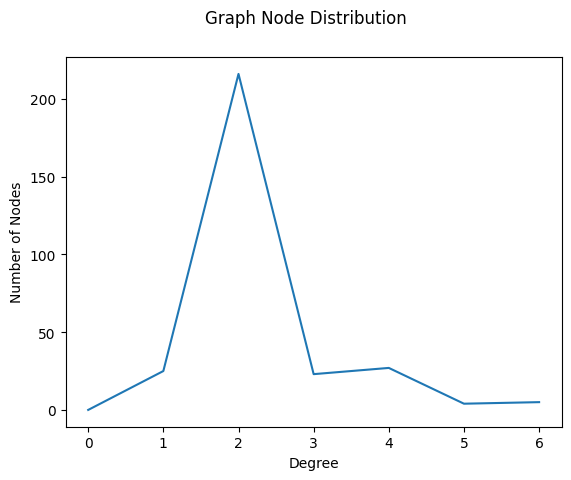

In [12]:
# create a metric extractor for the london subway graph in order to access its metrics
london_sub_metrics = Metric_Extractor(london_sub_graph.graph)
# printing graph metrics of london subway graph
print('Average Node Degree: '+str(london_sub_metrics.get_avg_degree()))
print('Total Edge Count: '+str(london_sub_metrics.get_edge_count()))
print('Total Node Count: '+str(london_sub_metrics.get_node_count()))
print('Degree count of Station_id 126: ' + str(london_sub_metrics.get_degree(126)))

# plotting the node distribution of the graph (the plot will open in a new window)
london_sub_metrics.plot_node_dist()

In [13]:
# creating an itinerary from station 36 to station 289 in order to find the shortest path
# setting the find shortest path method to Dijkstra
itinerary1 = Itinerary(london_sub_graph.graph, 36, 289, Dijkstra())
# printing itinerary
itinerary1.print_itinerary()

Itinerary:
Travel time is 2.
2 stations traversed.
36 --6--> 289


In [14]:
# another example of using Dijkstra to find the shortest path between 2 stations
itinerary1 = Itinerary(london_sub_graph.graph, 37, 123, Dijkstra())
# printing results of the algorithm: stored as a dictionary
print(str(itinerary1.find_shortest_path()) + '\n')
# printing itinerary
itinerary1.print_itinerary()

{'path': ['37', '301', '241', '230', '154', '153', '247', '164', '24', '156', '167', '188', '7', '145', '123'], 'stations traversed': 15, 'travel time': 35, 'lines': ['2', '2', '2', '2', '2', '2', '2', '2', '2', '8', '9', '9', '9', '11']}

Itinerary:
Travel time is 35.
15 stations traversed.
37 --2--> 301 --2--> 241 --2--> 230 --2--> 154 --2--> 153 --2--> 247 --2--> 164 --2--> 24 --2--> 156 --8--> 167 --9--> 188 --9--> 7 --9--> 145 --11--> 123


In [15]:
# example of itinerary using A* algorithm to find the shortest path between station 12 and 69
# strategy pattern allows us to choose which pathfinding algorithm is necessary to use
itinerary3 = Itinerary(london_sub_graph.graph, 301, 16, A_star())
# printing itinerary
itinerary3.print_itinerary()

Itinerary:
Travel time is 14.
7 stations traversed.
301 --2--> 215 --2--> 51 --2--> 103 --2--> 109 --2--> 91 --2--> 16


In [16]:
# example of using the Travelling Salesman Algorithm to find the patrol path that contains stations with ids 37, 123, 36, 289
# the base office of the patroller is station 17
patrolpath1 = PatrolPlanner(london_sub_graph.graph, [37, 123, 36, 289], 17)
patrol_path = patrolpath1.find_patrol_path()
patrolpath1.print_graph_path(patrol_path[0], patrol_path[1])

Patrol Path:
Travel time is 111.
Stations Traversed
17 --> 107 --> 192 --> 277 --> 89 --> 123 --> 145 --> 7 --> 188 --> 167 --> 37 --> 301 --> 241 --> 230 --> 154 --> 153 --> 247 --> 289 --> 289 --> 36 --> 33 --> 164 --> 24 --> 156 --> 13 --> 279 --> 285 --> 248 --> 273 --> 229 --> 236 --> 99 --> 74 --> 17


In [17]:
# given a graph, the library finds transportation islands and identifies how they are connected to each other
# transportation graph stores connections between transportation islands, it represents nodes as the index of that island
# on the list of transportation islands
islands = TransportationIslands(london_sub_graph.graph)
london_transportation_islands = islands.get_transportation_islands()
print(london_transportation_islands[0])
london_transportation_islands[1].print_all_connections()


[[1, 52, 73, 72, 286, 182, 194, 234, 176], [2, 156, 13, 250, 48, 126, 259, 192, 197, 49, 87, 279, 148, 233, 157, 29, 285, 248, 273, 229, 236, 99, 122, 146, 133, 107, 28, 162, 149, 208, 11, 163, 82, 193, 18, 83, 212, 104, 90, 145, 92, 14, 167, 188, 7, 89, 277, 102, 223, 198, 255, 25, 161, 44, 166, 263, 3, 151, 60], [4, 70, 32, 201, 27, 284, 155, 225, 276, 216, 41, 253, 174, 175, 23, 42, 120, 238, 61, 171, 135, 292, 295, 244, 164, 24, 33, 228], [5, 252, 251], [8], [9, 232], [10, 95, 123, 128, 39], [12, 257, 258, 59], [15, 269], [16, 91, 109, 103, 51, 215], [17, 110, 209, 242, 101, 227, 150, 147, 283, 218, 293], [19, 97, 65, 20, 217, 203, 63, 219, 43, 289, 200, 270, 247, 153], [21, 67, 66], [22, 47, 40, 139, 264, 170], [26, 260, 224, 274], [30, 190, 131, 130], [31], [34, 100], [36], [38, 58], [45, 243], [54, 55, 245, 191, 136, 35], [56], [71, 172], [74], [75, 210, 291, 115, 184, 199, 235], [76, 296, 226, 127], [77, 124], [78], [79], [80], [81], [84], [85, 129, 268, 267], [93, 165, 288, 30

In [18]:
# prints an easy to read summary of the transportations islands, which zone each one is a part of
# Furthermore, it prints which transportation islands are connected to which
islands.print_trans_island_summary()

Transportation Islands and Zones:

Island: [1, 52, 73, 72, 286, 182, 194, 234, 176]: --> Zone: 3
Connected to: 
[5, 252, 251]
[30, 190, 131, 130]
[265]

Island: [2, 156, 13, 250, 48, 126, 259, 192, 197, 49, 87, 279, 148, 233, 157, 29, 285, 248, 273, 229, 236, 99, 122, 146, 133, 107, 28, 162, 149, 208, 11, 163, 82, 193, 18, 83, 212, 104, 90, 145, 92, 14, 167, 188, 7, 89, 277, 102, 223, 198, 255, 25, 161, 44, 166, 263, 3, 151, 60]: --> Zone: 1
Connected to: 
[4, 70, 32, 201, 27, 284, 155, 225, 276, 216, 41, 253, 174, 175, 23, 42, 120, 238, 61, 171, 135, 292, 295, 244, 164, 24, 33, 228]
[10, 95, 123, 128, 39]
[22, 47, 40, 139, 264, 170]
[74]
[84]
[137, 206, 143, 159, 278]
[186]

Island: [4, 70, 32, 201, 27, 284, 155, 225, 276, 216, 41, 253, 174, 175, 23, 42, 120, 238, 61, 171, 135, 292, 295, 244, 164, 24, 33, 228]: --> Zone: 2
Connected to: 
[2, 156, 13, 250, 48, 126, 259, 192, 197, 49, 87, 279, 148, 233, 157, 29, 285, 248, 273, 229, 236, 99, 122, 146, 133, 107, 28, 162, 149, 208, 11, 163